
Missing Values per Column:
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Removed 0 duplicate rows

Unique values per categorical column:
department: 9 unique values
region: 34 unique values
education: 3 unique values
gender: 2 unique values
recruitment_channel: 3 unique values


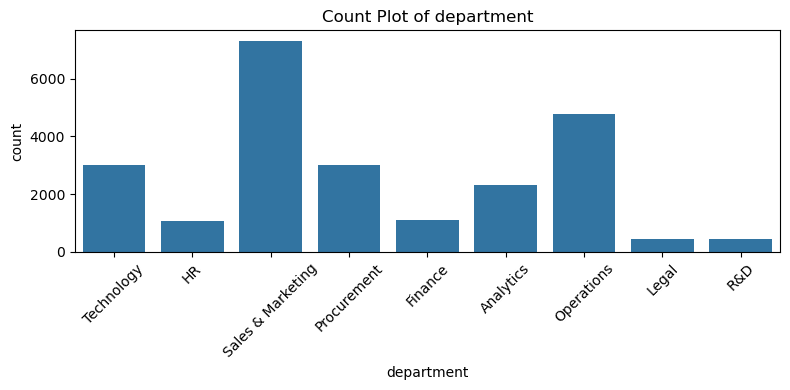

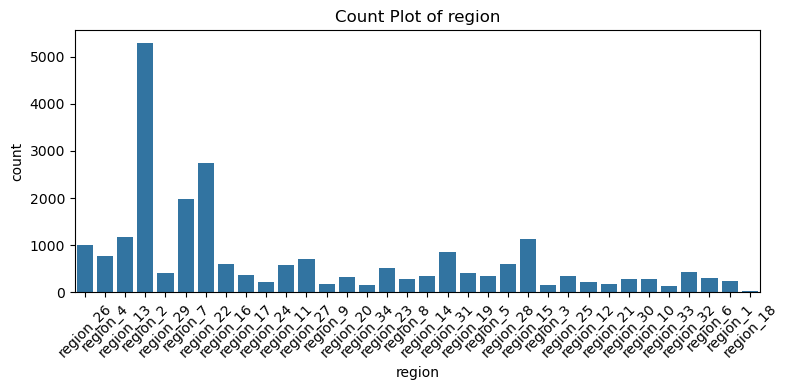

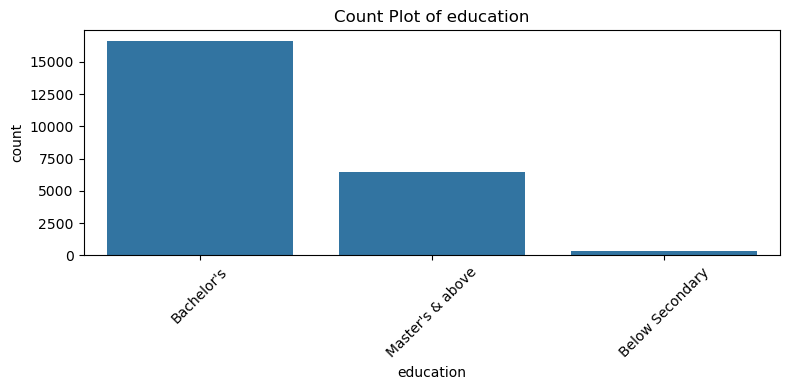

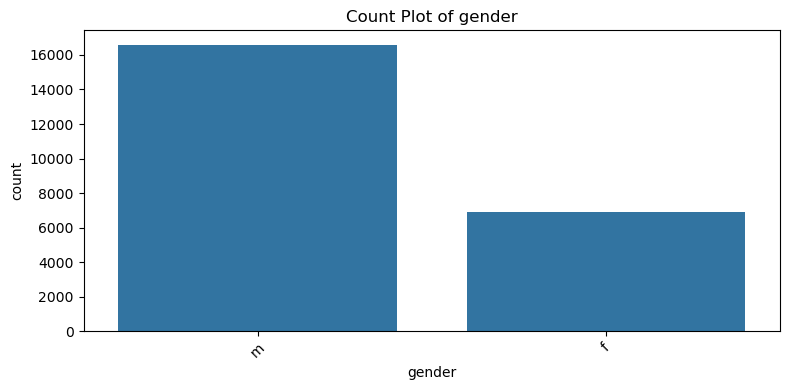

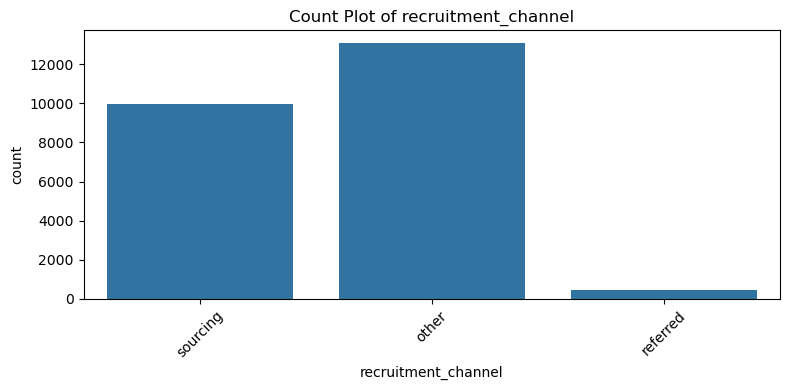

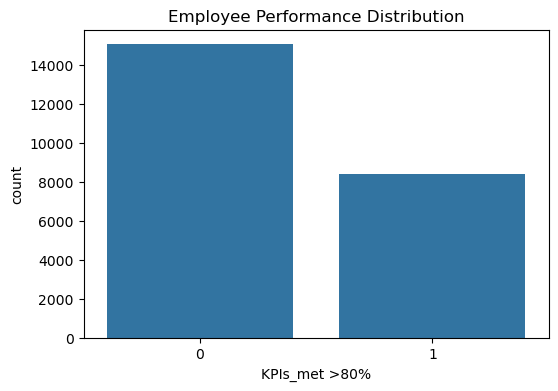

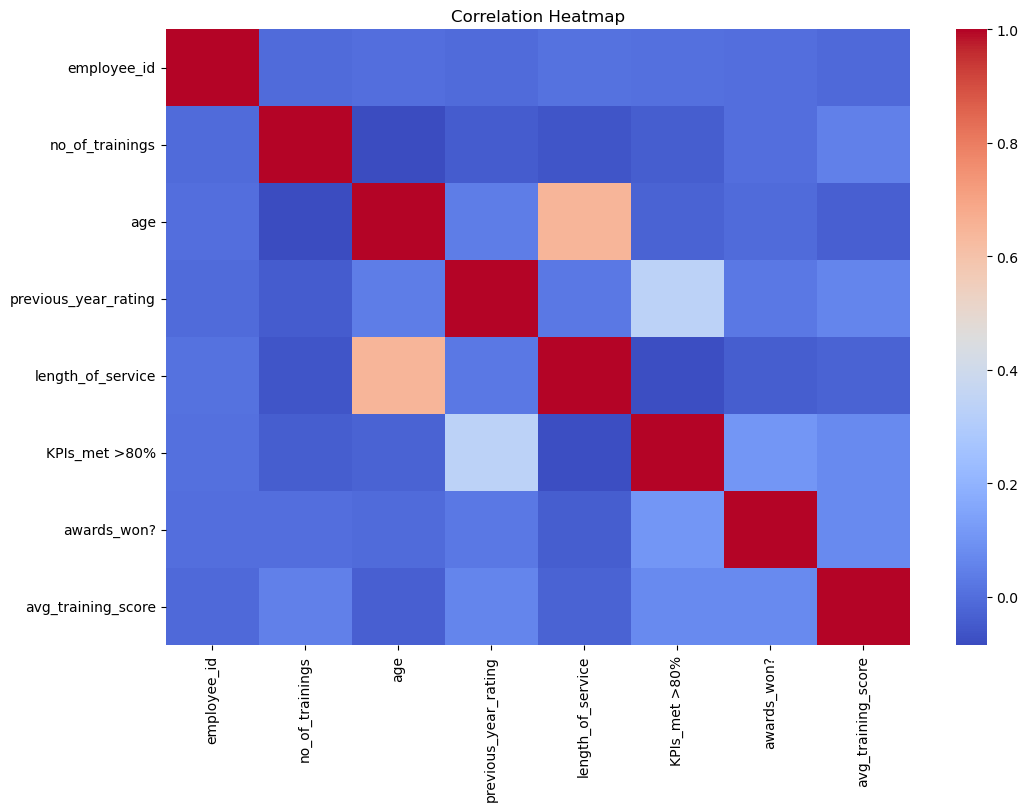


EDA INSIGHTS:
1. Dataset cleaned with no missing or duplicate values.
2. Certain categorical variables show imbalance and will require encoding.
3. Strong correlations observed among performance-related numeric features.
4. Target variable distribution checked for class imbalance.


In [7]:
# Task 1: Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('TestData_JesmiVJoy.csv')
df.head()

# Task 2: Data Cleaning
# ------------------------------
# Check missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Handle missing values
# Numeric columns → fill with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
   # df[col].fillna(df[col].median(), inplace=True)
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical columns → fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  #  df[col].fillna(df[col].mode()[0], inplace=True)
    df[categorical_cols] = df[categorical_cols].apply(
    lambda x: x.fillna(x.mode()[0])
)

# Remove duplicate rows
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_rows - df.shape[0]} duplicate rows")

# ------------------------------
# Check unique values for categorical features
# ------------------------------
print("\nUnique values per categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# ------------------------------
# Task 3: Visualization – Count Plots
# ------------------------------
# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col)
    ax.set_title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ------------------------------
# Target Variable Distribution (if exists)
# ------------------------------
target_col = 'KPIs_met >80%'

if target_col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target_col)
    plt.title("Employee Performance Distribution")
    plt.show()
else:
    print(f"Target column '{target_col}' not found in dataset")

# ------------------------------
# Correlation Heatmap (Numerical Features)
# ------------------------------
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------
# Key Insights (Printed for Report Use)
# ------------------------------
print("\nEDA INSIGHTS:")
print("1. Dataset cleaned with no missing or duplicate values.")
print("2. Certain categorical variables show imbalance and will require encoding.")
print("3. Strong correlations observed among performance-related numeric features.")
print("4. Target variable distribution checked for class imbalance.")